# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=eJfiC-K0VViA)
<br>
>>
>> [Preparación del Entorno](#scrollTo=UkU8akIVtlbn&line=3&uniqifier=1) \\
>>   \\
>> [6 - Pandas](#scrollTo=U3oTMspTVVjE&line=1&uniqifier=1) \\
>>
>>> [6.1. Actividad Guiada 2.4](#scrollTo=Hd88I7fxVVju&line=1&uniqifier=1) \\
>>>
>>> [6.2. Pandas Series](#scrollTo=uNp0KfRlVVkP&line=1&uniqifier=1) \\
>>>
>>>> [6.2.1. Índexadores: LOC, ILOC](#scrollTo=U75KhoMvVVod&line=1&uniqifier=1)
>>> 
>>> [6.3. Objetos Pandas Dataframe](#scrollTo=p1lS1-OrVVqk&line=1&uniqifier=1) \\
>>>
>>>> [6.3.1. Gestión de Columnas en Dataframes](#scrollTo=qs6V4BPTVVtZ&line=1&uniqifier=1)
>>>
>>> [6.4. Filtros en Dataframes](#scrollTo=ksw5H_LZVVuw&line=1&uniqifier=1) \\
>>>
>>>> [6.4.1. Funciones Universal sobre Pandas](#scrollTo=UZLEbp3pVVwh&line=1&uniqifier=1)
>>>>
>>>> [6.4.2. Alineamiento de los Índices](#scrollTo=xipiuI1kVVw0&line=1&uniqifier=1)
>>>>
>>>> [6.4.3. Valores Faltantes](#scrollTo=HF-DJJD5VVx7&line=1&uniqifier=1)
>>>>
>>>> [6.4.4. Actividad Guiada 2.4](#scrollTo=0y-SXC80VVzh&line=1&uniqifier=1)

# Preparación del entorno

¡Padawan!, cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

Cloning into '/content/mbdds_fc20'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 724 (delta 8), reused 12 (delta 3), pack-reused 705
Receiving objects: 100% (724/724), 12.21 MiB | 32.81 MiB/s, done.
Resolving deltas: 100% (497/497), done.
Already up to date.
/content/mbdds_fc20/Python
     |████████████████████████████████| 358kB 2.7MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 3.5MB 8.5MB/s 
     |████████████████████████████████| 194kB 32.7MB/s 
     |████████████████████████████████| 1.0MB 36.7MB/s 
     |████████████████████████████████| 1.8MB 41.3MB/s 
     |████████████████████████████████| 20.9MB 2.1MB/s 
     |████████████████████████████████| 870kB 31.0MB/s 
     |████████████████████████████████| 481kB 43.6MB/s 
     |████████████████████████████████| 686kB 41.4MB/s 
     |████████████████████████████████| 911kB 31.1MB/

# 6 - Pandas

Pandas es una abreviación de Panel Data. Los objetos dentro de pandas dan soporte al análisis de datos con variables de distinta tipología: categóricas, binarias, numéricas...

Respecto a los numpy, permiten indexar las filas y columnas. Este tipo de indexación facilita, por ejemplo, realizar análisis de series temporales, no necesariamente, con una frecuencia fija.

Como siempre, el primer paso consiste en cargar la librería con *namespace* `pd`:

In [ ]:
import pandas as pd

##### 6.1. Actividad Guiada 2.4

Esta vez, se trata de seleccionar el mejor planeta posible para ubicar la academia Jedi. Los parámetros de la búsqueda son:

- Días largos para entrenar mucho.
- Mucha agua para poder refrescarse.
- Poca densidad de población para no ser molestado.
- Buen clima (temperado o tropical).

>     «Si existe un auténtico centro del universo, ahora estás en el planeta más alejado de él» 
    ―Luke Skywalker sobre Tatooine el planeta desértico dónde nacieron Anakin y Luke Skywalker. 

El primer paso consiste en cargar los datos de los planetas:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
planets_df = entidades_df['planets'][["rotation_period","diameter","climate"
                                      ,"temperate_tropical","gravity"
                                     ,"surface_water","population"]].dropna()
planets_df = planets_df[planets_df.diameter>0]


planets_df

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population
name,,,,,,,
Tatooine,23.0,10465.0,arid,0,1.00,1.0,2.000000e+05
Alderaan,24.0,12500.0,temperate,1,1.00,40.0,2.000000e+09
Yavin IV,24.0,10200.0,"temperate, tropical",1,1.00,8.0,1.000000e+03
Bespin,12.0,118000.0,temperate,1,1.50,0.0,6.000000e+06
Endor,18.0,4900.0,temperate,1,0.85,8.0,3.000000e+07
Naboo,26.0,12120.0,temperate,1,1.00,12.0,4.500000e+09
Kamino,27.0,19720.0,temperate,1,1.00,100.0,1.000000e+09
Geonosis,30.0,11370.0,"temperate, arid",1,0.90,5.0,1.000000e+11
Utapau,27.0,12900.0,"temperate, arid, windy",1,1.00,0.9,9.500000e+07


### 6.2. Pandas Series

Se definen como un array uni-dimensional indexado.

Se puede crear desde una lista:

In [ ]:
a = pd.Series([1.2, 0.4, 2.3])
a

0    1.2
1    0.4
2    2.3
dtype: float64

Como ves, une valores e índice. Accedemos a los valores en formato numpy con `.values`:

In [ ]:
a.values

array([1.2, 0.4, 2.3])

Los índices tienen su propio tipo y accedemos con `.index`:

In [ ]:
a.index

RangeIndex(start=0, stop=3, step=1)

Mismas funcionalidades *slicing*, funciones, *fancy indexing* que los arrays numpy:

In [ ]:
a[1:3] * 2

1    0.8
2    4.6
dtype: float64

Podemos declarar el índice de forma explícita:

In [ ]:
a = pd.Series([1.2, 0.4, 2.3], index=['a','b','c'])
a

a    1.2
b    0.4
c    2.3
dtype: float64

O bien, a partir de un diccionario:

In [ ]:
a = pd.Series({'a': 1.2, 'b': 0.4, 'c': 2.3})
a

a    1.2
b    0.4
c    2.3
dtype: float64

El índice añade la capacidad de filtrar a partir de sus valores:

In [ ]:
a[['b','c']]

b    0.4
c    2.3
dtype: float64

Incluso, tiene los métodos de un diccionario:

In [ ]:
a.keys()

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
list(a.items())

[('a', 1.2), ('b', 0.4), ('c', 2.3)]

#### 6.2.1. Índexadores: LOC, ILOC

Se utilizan para modificar el comportamiento de los filtros.

Su función es evitar colisiones entre índices y posiciones. Por ejemplo, la siguiente serie tiene índices enteros:

In [ ]:
a = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
a

1    a
3    b
5    c
dtype: object

Si se accede al valor del índice 1.

In [ ]:
a[1]

'a'

En cambio, si se pide los valores de las posiciones 1 a 3 con slicing.

In [ ]:
a[1:3]

3    b
5    c
dtype: object

Para evitar estas confusiones se introduce `.loc` que permite realizar un acceso a los valores siempre basados en el índice.

In [ ]:
a.loc[1]

'a'

In [ ]:
a.loc[1:3]

1    a
3    b
dtype: object

Por contra `.iloc` tiene la finalidad contraria, realizar el acceso por posición.

In [ ]:
a.iloc[1]

'b'

In [ ]:
a.iloc[1:3]

3    b
5    c
dtype: object

### 6.3. Objetos Pandas Dataframe

Se pueden ver como una generalización de los numpy o incluso de los diccionarios. 

Para poderlo visualizar, partimos de dos series, una serie del diámetro y otra de la población de los planetas:

In [ ]:
diameter_dict = {'Tatooine': 10465.0,'Alderaan': 12500.0
                 ,'Bespin': 118000.0,'Endor': 4900.0,'Naboo': 12120.0}
population_dict = {'Tatooine': 2.000000e+05,'Alderaan': 2.000000e+09
                   ,'Bespin': 6.000000e+06,'Endor': 3.000000e+07,'Naboo': 4.500000e+09}


In [ ]:
population = pd.Series(population_dict)
population

Tatooine    2.000000e+05
Alderaan    2.000000e+09
Bespin      6.000000e+06
Endor       3.000000e+07
Naboo       4.500000e+09
dtype: float64

In [ ]:
diameter = pd.Series(diameter_dict)
diameter

Tatooine     10465.0
Alderaan     12500.0
Bespin      118000.0
Endor         4900.0
Naboo        12120.0
dtype: float64

Ahora, construimos un `DataFrame` con el método `pd.DataFrame()`:

In [ ]:
planetas = pd.DataFrame({'population': population,
                       'diameter': diameter})
planetas

,population,diameter
Tatooine,2.000000e+05,10465.0
Alderaan,2.000000e+09,12500.0
Bespin,6.000000e+06,118000.0
Endor,3.000000e+07,4900.0
Naboo,4.500000e+09,12120.0


Al igual que ocurre con las series, accedemos a su índice fila con `.index`:

In [ ]:
planetas.index

Index(['Tatooine', 'Alderaan', 'Bespin', 'Endor', 'Naboo'], dtype='object')

También, accedemos al índice de las columnas con `.columns`:

In [ ]:
planetas.columns

Index(['population', 'diameter'], dtype='object')

Podemos construir a partir de numpy, especificando el nombre de las columnas:

In [ ]:
a = np.ones((3,2))
a

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
b = pd.DataFrame(a, columns=["col1","col2"])
b

,col1,col2
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


Podemos recuperar el numpy con `.values`:

In [ ]:
b.values

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Accedemos a los tipos internos con `.dtypes`:

In [ ]:
planets_df.dtypes

rotation_period       float64
diameter              float64
climate                object
temperate_tropical      int32
gravity               float64
surface_water         float64
population            float64
dtype: object

#### 6.3.1. Gestión de Columnas en Dataframes

Accedemos a las series que forman un DataFrame utilizando la anotación de diccionario:

In [ ]:
planets_df["population"]

name
Tatooine       2.000000e+05
Alderaan       2.000000e+09
Yavin IV       1.000000e+03
Bespin         6.000000e+06
Endor          3.000000e+07
Naboo          4.500000e+09
Kamino         1.000000e+09
Geonosis       1.000000e+11
Utapau         9.500000e+07
Mustafar       2.000000e+04
Kashyyyk       4.500000e+07
Corellia       3.000000e+09
Rodia          1.300000e+09
Ord Mantell    4.000000e+09
Mon Cala       2.700000e+10
Chandrila      1.200000e+09
Sullust        1.850000e+10
Ryloth         1.500000e+09
Glee Anselm    5.000000e+08
Muunilinst     5.000000e+09
Name: population, dtype: float64

También, como si fuera un atributo:

In [ ]:
planets_df.diameter

name
Tatooine        10465.0
Alderaan        12500.0
Yavin IV        10200.0
Bespin         118000.0
Endor            4900.0
Naboo           12120.0
Kamino          19720.0
Geonosis        11370.0
Utapau          12900.0
Mustafar         4200.0
Kashyyyk        12765.0
Corellia        11000.0
Rodia            7549.0
Ord Mantell     14050.0
Mon Cala        11030.0
Chandrila       13500.0
Sullust         12780.0
Ryloth          10600.0
Glee Anselm     15600.0
Muunilinst      13800.0
Name: diameter, dtype: float64

Podemos crear nuevas columnas o series. Por ejemplo, calculamos:

- El área en Km²  del planeta (suponiendo que son esféricos): $4*\pi*Radio²$.
- La densidad poblacional en habitantes / Km².

In [ ]:
import math
planets_df["area"] = 4 * math.pi * (planets_df["diameter"]/2)**2
planets_df["density"] = planets_df["population"] / planets_df["area"]

Para seleccionar varias columnas utilizamos listas. Observa que ahora, se mantiene la clase DataFrame:

In [ ]:
planets_df[["population","diameter","area","density"]].head()

,population,diameter,area,density
name,,,,
Tatooine,2.000000e+05,10465.0,3.440554e+08,0.000581
Alderaan,2.000000e+09,12500.0,4.908739e+08,4.074367
Yavin IV,1.000000e+03,10200.0,3.268513e+08,0.000003
Bespin,6.000000e+06,118000.0,4.374354e+10,0.000137
Endor,3.000000e+07,4900.0,7.542964e+07,0.397722


Modificaremos el nombre de una columna con `.rename()`:

In [ ]:
planets_df.rename(columns={"area": "Area", "density": "Densidad"}, inplace=True)
planets_df.head()

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Area,Densidad
name,,,,,,,,,
Tatooine,23.0,10465.0,arid,0,1.00,1.0,2.000000e+05,3.440554e+08,0.000581
Alderaan,24.0,12500.0,temperate,1,1.00,40.0,2.000000e+09,4.908739e+08,4.074367
Yavin IV,24.0,10200.0,"temperate, tropical",1,1.00,8.0,1.000000e+03,3.268513e+08,0.000003
Bespin,12.0,118000.0,temperate,1,1.50,0.0,6.000000e+06,4.374354e+10,0.000137
Endor,18.0,4900.0,temperate,1,0.85,8.0,3.000000e+07,7.542964e+07,0.397722


Eliminaremos las columnas con `.drop()`:

In [ ]:
planets_df.drop(columns="Area", inplace=True, errors="ignore")
planets_df.head()

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Tatooine,23.0,10465.0,arid,0,1.00,1.0,2.000000e+05,0.000581
Alderaan,24.0,12500.0,temperate,1,1.00,40.0,2.000000e+09,4.074367
Yavin IV,24.0,10200.0,"temperate, tropical",1,1.00,8.0,1.000000e+03,0.000003
Bespin,12.0,118000.0,temperate,1,1.50,0.0,6.000000e+06,0.000137
Endor,18.0,4900.0,temperate,1,0.85,8.0,3.000000e+07,0.397722


### 6.4. Filtros en Dataframes

Funciona la misma lógica de selección que numpys y series pandas, pero ahora con dos dimensiones:

In [ ]:
planets_df.loc[planets_df.Densidad > 50, ['population', 'Densidad']]

,population,Densidad
name,,
Geonosis,1.000000e+11,246.223329
Mon Cala,2.700000e+10,70.641981


Como curiosidad, el slicing y filtros lógicos, se realiza por filas:

In [ ]:
planets_df[planets_df.Densidad > 50]

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Geonosis,30.0,11370.0,"temperate, arid",1,0.9,5.0,1.000000e+11,246.223329
Mon Cala,21.0,11030.0,temperate,1,1.0,100.0,2.700000e+10,70.641981


Otra curiosidad: ahora, los filtros por posición se comportan como en R, a diferencia de numpy.

In [ ]:
a = planets_df.iloc[[1,7,14],[1,2,4]]
a


,diameter,climate,gravity
name,,,
Alderaan,12500.0,temperate,1.0
Geonosis,11370.0,"temperate, arid",0.9
Mon Cala,11030.0,temperate,1.0


En cambio, en numpy, se apareaban las coordenadas 2 a 2:

In [ ]:
planets_df.values[[1,4,5],[1,2,4]]

array([12500.0, 'temperate', 1.0], dtype=object)

Continúa realizándose la asignación de vistas sin copia:

In [ ]:
a = pd.DataFrame(np.ones((3,2)), columns=["col1","col2"])
b = a.iloc[0:2,0:1]
b

,col1
0,1.0
1,1.0


In [ ]:
b.iloc[1,0] = 20
a

,col1,col2
0,1.0,1.0
1,20.0,1.0
2,1.0,1.0


> **Recuerda**: cuando sea necesario, realiza la copia del objeto con `.copy()`, de esta forma evitarás que se modifiquen todas las copias.

In [ ]:
a = pd.DataFrame(np.ones((3,2)), columns=["col1","col2"])
b = a.iloc[0:2,0:1].copy()
b.iloc[1,0] = 20
a

,col1,col2
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


Ya hemos aprendido a ver las primeras 5 filas con `.head()`. También es posible ver las últimas filas con `.tail()`:

In [ ]:
planets_df.tail(2)

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Glee Anselm,33.0,15600.0,"tropical, temperate",1,1.0,80.0,5.000000e+08,0.653990
Muunilinst,28.0,13800.0,temperate,1,1.0,25.0,5.000000e+09,8.357222


#### 6.4.1. Funciones Universal sobre Pandas

Las funciones universales (ufunc) que hemos visto en el capítulo anterior, las podemos aplicar, de igual modo, sobre objetos pandas:

In [ ]:
a =  np.sqrt(planets_df[["rotation_period","diameter"]].tail(2))
a

,rotation_period,diameter
name,,
Glee Anselm,5.744563,124.899960
Muunilinst,5.291503,117.473401


Vemos cómo, en este caso, hemos aplicado la función de numpy, raiz cuadrada, sobre un DataFrame y esta se ha aplicado sobre cada elemento, respetando los índices fila y columna de la tabla:

#### 6.4.2. Alineamiento de los Índices

Cuando realizamos operaciones aritméticas entre dos pandas, los índices fila y columna se alinean automáticamente:

In [ ]:
a = planets_df.iloc[[1,3,4],[4,7]]
a

,gravity,Densidad
name,,
Alderaan,1.00,4.074367
Bespin,1.50,0.000137
Endor,0.85,0.397722


In [ ]:
b = planets_df.iloc[[1,4,7],[4,7]]
b

,gravity,Densidad
name,,
Alderaan,1.00,4.074367
Endor,0.85,0.397722
Geonosis,0.90,246.223329


In [ ]:
a + b

,gravity,Densidad
name,,
Alderaan,2.0,8.148733
Bespin,NaN,NaN
Endor,1.7,0.795443
Geonosis,NaN,NaN


Cuando se resta un vector fila a un Data Frame, siguiendo las reglas del Broadcasting, esta operación se aplica a todas las filas:

In [ ]:
a

,gravity,Densidad
name,,
Alderaan,1.00,4.074367
Bespin,1.50,0.000137
Endor,0.85,0.397722


In [ ]:
c = a.iloc[0]
c

gravity     1.000000
Densidad    4.074367
Name: Alderaan, dtype: float64

In [ ]:
a - c 

,gravity,Densidad
name,,
Alderaan,0.00,0.000000
Bespin,0.50,-4.074229
Endor,-0.15,-3.676645


#### 6.4.3. Valores Faltantes

`None` y `np.nan` en Pandas tienen mucha similitud. Para ver un ejemplo, antes preparamos unos datos de ejemplo: 

In [ ]:
print(planets_df.columns)
planetsNA = planets_df[["gravity", "climate", "temperate_tropical"]].head().copy()
planetsNA.head()

Index(['rotation_period', 'diameter', 'climate', 'temperate_tropical',
       'gravity', 'surface_water', 'population', 'Densidad'],
      dtype='object')


,gravity,climate,temperate_tropical
name,,,
Tatooine,1.00,arid,0
Alderaan,1.00,temperate,1
Yavin IV,1.00,"temperate, tropical",1
Bespin,1.50,temperate,1
Endor,0.85,temperate,1


In [ ]:
print("planetsNA tiene shape: ", planetsNA.shape)
planetsNA.dtypes # vemos los tipos internos

planetsNA tiene shape:  (5, 3)


gravity               float64
climate                object
temperate_tropical      int32
dtype: object

Ahora inyectamos None y NaN.

In [ ]:
planetsNA.loc[1:4,"gravity"] = None
planetsNA.loc[0:2,"temperate_tropical"] = np.nan
planetsNA.loc[0:2,"climate"] = np.nan
planetsNA.loc[2:4,"climate"] = None
planetsNA

,gravity,climate,temperate_tropical
name,,,
Tatooine,1.00,NaN,NaN
Alderaan,NaN,NaN,NaN
Yavin IV,NaN,None,1.0
Bespin,NaN,None,1.0
Endor,0.85,temperate,1.0


In [ ]:
planetsNA.dtypes

gravity               float64
climate                object
temperate_tropical    float64
dtype: object

Observa que:

- `gravity` que era de tipo `float`, al insertar `None`, éste se ha convertido en `np.nan`.
- `climate` con tipo object, diferencia `NaN` y `None`.
- `rotation_period` que inicialmente era de tipo entero (`int`), al asignar `np.nan`, hace el casting automáticamente a `float`



Cuatro métodos interesantes:

- isnull() / notnull(): Marca con `True/False` los valores faltantes.
- dropna(): Elimina filas y columnas con algún valor faltante.
- fillna(): Devuelve una copia de los datos con valores faltantes rellenados.

In [ ]:
planetsNA.isnull() # np.nan y None se comportan igual.

,gravity,climate,temperate_tropical
name,,,
Tatooine,False,True,True
Alderaan,True,True,True
Yavin IV,True,True,False
Bespin,True,True,False
Endor,False,False,False


In [ ]:
planetsNA.dropna() # np.nan y None se comportan igual.

,gravity,climate,temperate_tropical
name,,,
Endor,0.85,temperate,1.0


In [ ]:
planetsNA.fillna(0)  # una forma de rellenar missings.

,gravity,climate,temperate_tropical
name,,,
Tatooine,1.00,0,0.0
Alderaan,0.00,0,0.0
Yavin IV,0.00,0,1.0
Bespin,0.00,0,1.0
Endor,0.85,temperate,1.0


#### 6.4.4. Actividad Guiada 2.4

Ahora, tenemos todas las herramientas para resolver la actividad:

- Días largos para entrenar mucho.
- Mucha agua para poder refrescarse.
- Poca densidad de población para no ser molestado.
- Buen clima (temperado o tropical).

Veamos su distribución con Boxplot:

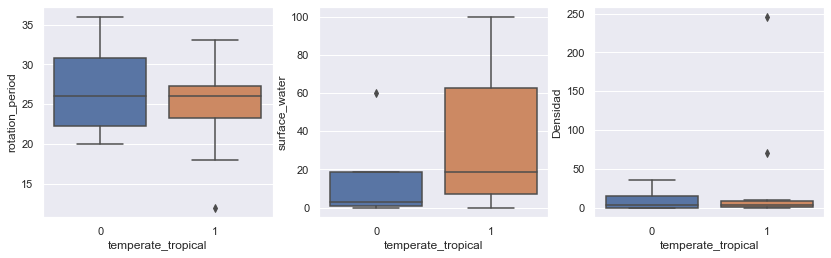

In [ ]:
sns.set(rc={'figure.figsize':(14,4)})
fig, axs = plt.subplots(ncols=3)
plt.gcf().subplots_adjust(bottom=0.15)
sns.boxplot(x='temperate_tropical', y='rotation_period', data=planets_df, ax=axs[0])
sns.boxplot(x='temperate_tropical', y='surface_water', data=planets_df, ax=axs[1])
sns.boxplot(x='temperate_tropical', y='Densidad',data=planets_df, ax=axs[2]);

- Rotaciones por encima de 24, están por encima de la mediana (eje central boxplot).
- % de superficie del agua por encima de 10%, evita planetas no idóneos.
- Densidad  por debajo de 50 personas por Km² es más que suficiente para filtrar planetas demasiado poblados. 

In [ ]:
planets_df_sel = planets_df[(planets_df.Densidad<50) 
                            & (planets_df.rotation_period>24) 
                            & (planets_df.surface_water>10)]
print(planets_df_sel.shape)
planets_df_sel

(7, 8)


,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Naboo,26.0,12120.0,temperate,1,1.0,12.0,4.500000e+09,9.751185
Kamino,27.0,19720.0,temperate,1,1.0,100.0,1.000000e+09,0.818533
Kashyyyk,26.0,12765.0,tropical,1,1.0,60.0,4.500000e+07,0.087907
Corellia,25.0,11000.0,temperate,1,1.0,70.0,3.000000e+09,7.891981
Rodia,29.0,7549.0,hot,0,1.0,60.0,1.300000e+09,7.261304
Glee Anselm,33.0,15600.0,"tropical, temperate",1,1.0,80.0,5.000000e+08,0.653990
Muunilinst,28.0,13800.0,temperate,1,1.0,25.0,5.000000e+09,8.357222


Quedan 7 planetas. Veamos, ahora, un gráfico de dispersión con un resumen de las principales variables:

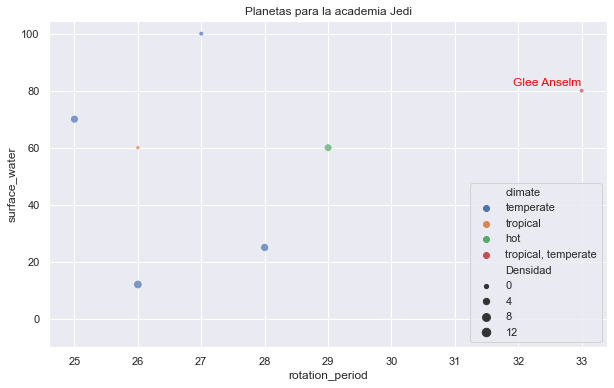

In [ ]:
sns.set(rc={'figure.figsize':(10,6)});
g = sns.scatterplot(x="rotation_period", y = "surface_water", data=planets_df_sel
                            , alpha =0.7
                            , hue= "climate"
                            , size="Densidad")
g.set_title('Planetas para la academia Jedi');
plt.legend(loc='lower right')
limit = g.set(ylim=(-10, None));

# buscamos el planeta que hay que etiquetar
planets_df_sel_final = planets_df_sel[(planets_df_sel.rotation_period>30)&(planets_df_sel.surface_water>60) ]
# insertamos la etiqueta
p = plt.annotate(planets_df_sel_final.index[0],
             (planets_df_sel_final.rotation_period[0],planets_df_sel_final.surface_water[0])
             , textcoords="offset points" # desplaza el punto
             , xytext=(0,5)  # distancia desplazamiento
             , ha='right'
            , color="red")   # centrado)


¡Parece que ya tenemos destino perfecto para la academia Jedi! Se llama **Glee Anselm**

Veamos sus datos:

In [ ]:
planets_df_sel_final

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Glee Anselm,33.0,15600.0,"tropical, temperate",1,1.0,80.0,500000000.0,0.65399
